- Read the dataset from the URL into a dataframe.
- Display the first few rows to make sure it was read properly.

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None,
                sep='\s+')
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
             "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Visualize the important characteristics of the dataset before building the model - Exploratory Data Analysis (EDA). We will create a scatter matrix to visualize the pair-wise correlations between different features in the dataset.

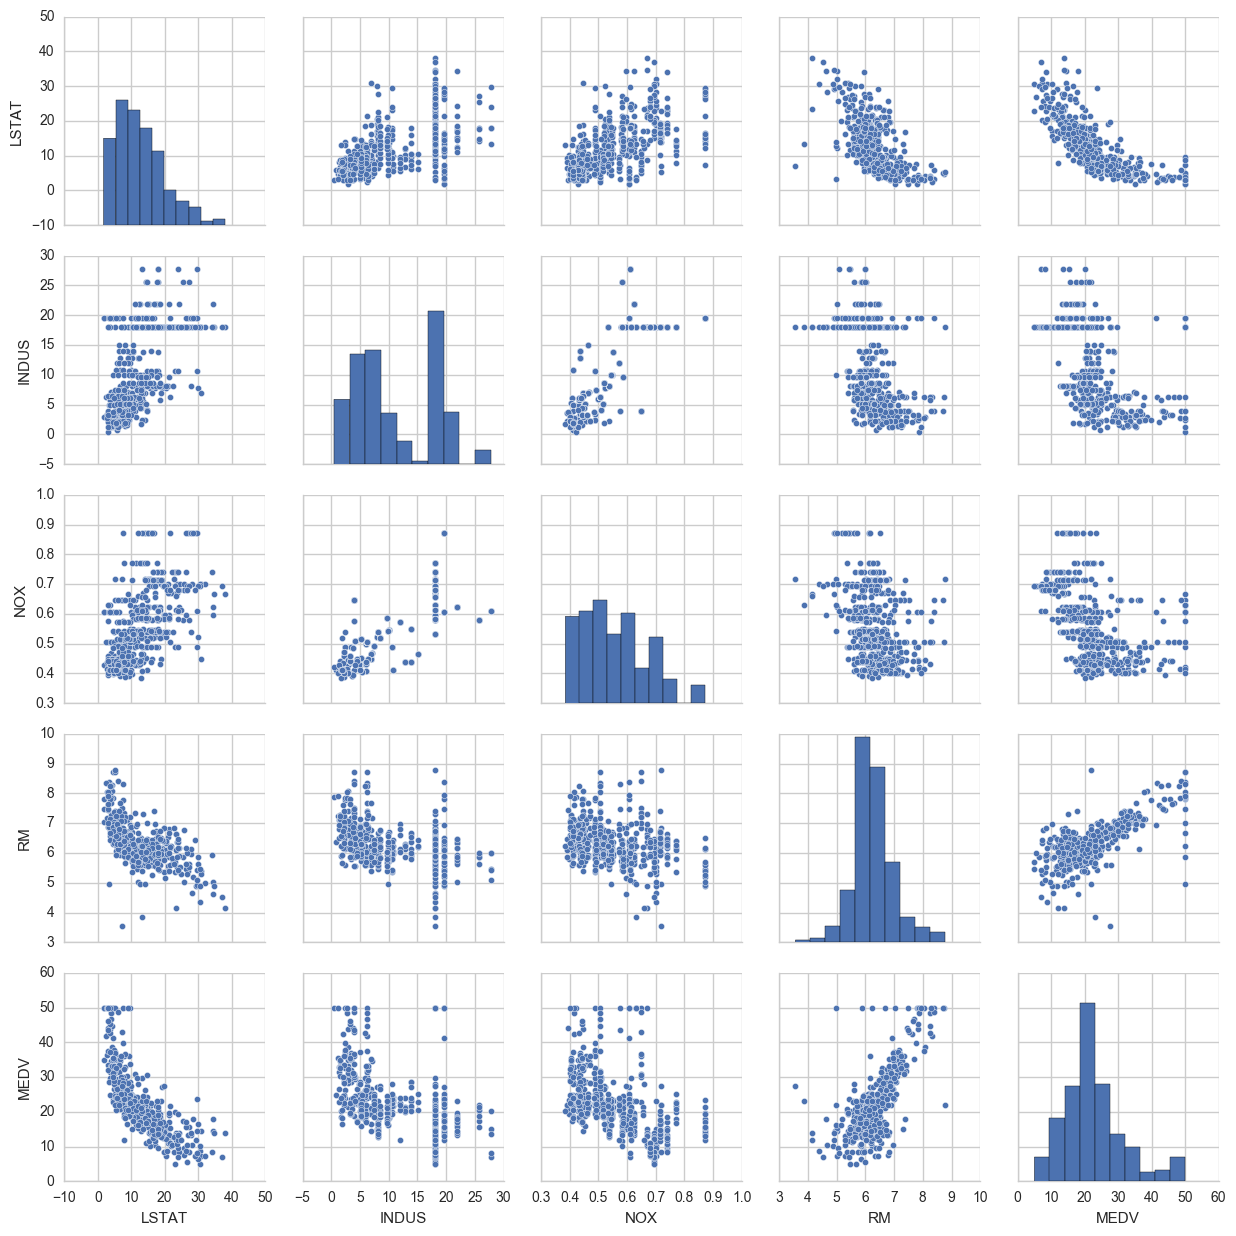

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid', context='notebook')
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sb.pairplot(df[cols], size=2.5)
plt.show()

Create a correlation matrix to quantify the linear relationship between features.

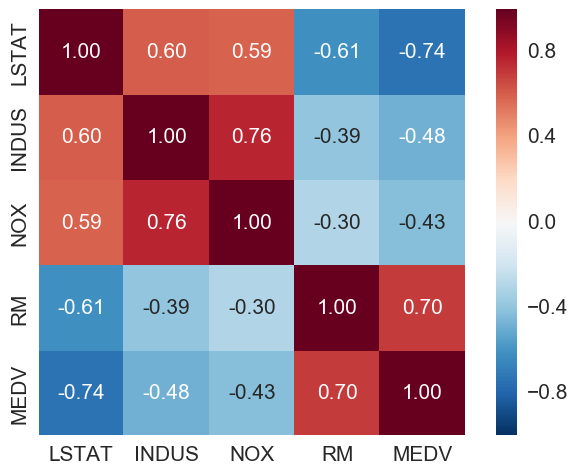

In [3]:
import numpy as np
cor_matrix = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.5)
cor_heat_map = sb.heatmap(cor_matrix, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':15},
                         yticklabels=cols,
                         xticklabels=cols)
plt.show()

By convention, a capital letter represents a matrix. A small letter denotes a vector.

We now separate the independent and dependent variables into two variables X and y. We also standardize the data.

In [4]:
# The capital letter X represents a matrix
X = df[["RM"]].values
# The small letter y represents a vector
y = df[["MEDV"]].values
print df[["MEDV"]].head()

   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

Let's see how sklearn does the scaling. Sklearn is minimize our task of scaling. Manual scaling is shown in next block.

In [6]:
print "Original data\n", y[0:4]
print "Scaled data using sklearn StandardScaler\n", y_std[0:4]

Original data
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]]
Scaled data using sklearn StandardScaler
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]]


Standard Deviation is the square root of variance.

Standard Deviation = sqrt(((x1 - Mean)^2 + (x2 - Mean)^2 + (x3 - Mean)^2 + ..... + (xn - Mean)^2) / #DataPoints)

Let's do the same computation manually

In [7]:
print "Average of original data: ", np.average(y[:])
print "Standard Deviation of original data: ", np.std(y[:])
z_scores = (y[:] - np.average(y[:])) / np.std(y[:])
print "Manually computed Z scores:\n", z_scores[0:4]

Average of original data:  22.5328063241
Standard Deviation of original data:  9.18801154528
Manually computed Z scores:
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]]


Build the linear regression model. First let's fit the original, non-standardized data

In [8]:
from sklearn.linear_model import LinearRegression
# slr stands for Standard Linear Regression
slr = LinearRegression()
slr.fit(X, y)
print "Slope: %.3f" % slr.coef_[0]
print "Intercept: %.3f" % slr.intercept_

Slope: 9.102
Intercept: -34.671


Now let's try with the standardized data

In [9]:
slr_std = LinearRegression()
slr_std.fit(X_std, y_std)
print "Slope: %.3f" % slr_std.coef_[0]
print "Intercept: %.3f" % slr_std.intercept_

Slope: 0.695
Intercept: -0.000


Let's make predictions using both models. First up, the standardized model

In [10]:
num_rooms = [5.0]

num_rooms_std = sc_x.transform(np.array(num_rooms).reshape(len(num_rooms), 1))
print "Standardized rooms: %.3f" % num_rooms_std
predicted_price_std = slr_std.predict(num_rooms_std)
print "Predicted Price std: %.3f" % predicted_price_std
print "Predicted Price in $1000s using standardized data: %.3f" % sc_y.inverse_transform(predicted_price_std)

Standardized rooms: -1.830
Predicted Price std: -1.273
Predicted Price in $1000s using standardized data: 10.840


Now let's check the prediction for non-standardized data. The prediction for both model will give the exact same results.

In [11]:
predicted_price_non_std = slr.predict(np.array(num_rooms).reshape(len(num_rooms), 1))
print "Predicted Price in $1000s using non-standardized data: %.3f" % predicted_price_non_std

Predicted Price in $1000s using non-standardized data: 10.840


Visualize how well the linear regression line fits the standardized data:
    - Plot a scatterplot of the training data
    - Add the regression line

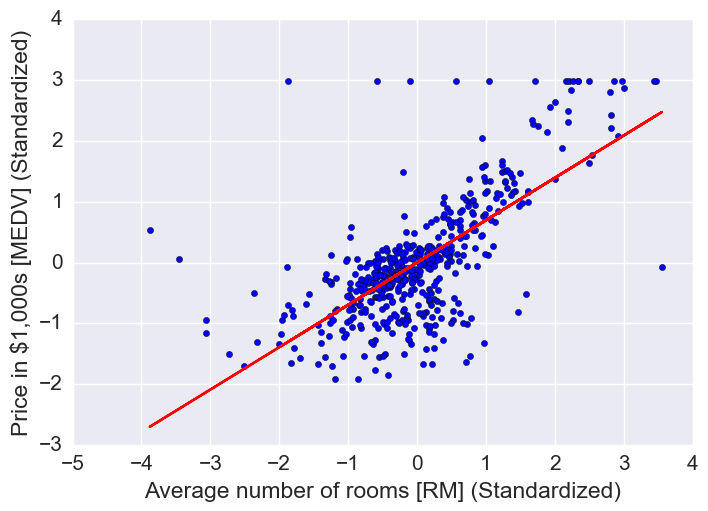

In [12]:
plt.scatter(X_std, y_std, c='blue')
plt.plot(X_std, slr_std.predict(X_std), color='red')
plt.xlabel("Average number of rooms [RM] (Standardized)")
plt.ylabel("Price in $1,000s [MEDV] (Standardized)")
plt.show()

Let's now visualize the original, non-standardized training data and regression line

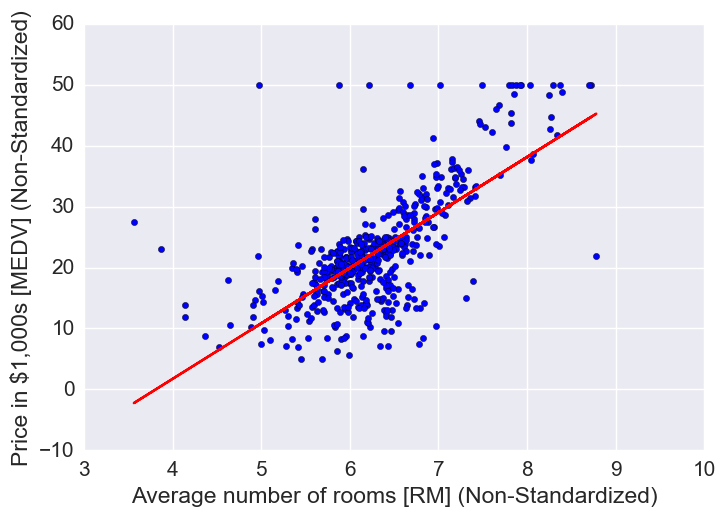

In [13]:
plt.scatter(X, y, c='blue')
plt.plot(X, slr.predict(X), color='red')
plt.xlabel("Average number of rooms [RM] (Non-Standardized)")
plt.ylabel("Price in $1,000s [MEDV] (Non-Standardized)")
plt.show()

Evaluate the performance of the regression model on training data. First, the non-standardized dataset.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
MSE1 = mean_squared_error(y_true=y, y_pred=slr.predict(X))
r2_1 = r2_score(y_true=y, y_pred=slr.predict(X))
print "Mean Square Error for regression model using non-standardized feature: %.3f" % MSE1
print "Root Mean Square Error: " , np.sqrt(MSE1)
# Value of R2 closer to ONE is better! R2 = 0.48 means the model captures 48% of the data
print "R2: ", r2_1

Mean Square Error for regression model using non-standardized feature: 43.601
Root Mean Square Error:  6.60307138922
R2:  0.483525455991


Let's do the same thing for standardized data

In [ ]:
MSE_2 = mean_squared_error(y_true=y_std, y_pred=slr_std.predict(X_std))
print "Mean Square Error for standardized data: ", MSE_2
y_true_converted_to_original = sc_y.inverse_transform(y_std)
y_pred_converted_to_original = sc_y.inverse_transform(slr_std.predict(X_std))
MSE2 = mean_squared_error(y_true=y_true_converted_to_original,
                         y_pred=y_pred_converted_to_original)
r2_2 = r2_score(y_true=y_std, y_pred=slr_std.predict(X_std))
r2_2_using_data_converted_to_original_scale = r2_score(y_true=y_true_converted_to_original,
                                                      y_pred=y_pred_converted_to_original)
print "MSE using standardized features converted to original scale: %.3f" % MSE2
print "RMSE: ", np.sqrt(MSE2)

The beautiful thing about the metric R2 is that irrespective of the scaling of data, its value does not change!

In [16]:
print "R2 using standardized data and model: ", r2_2
print "R2 using data converted to original scale: ", r2_2_using_data_converted_to_original_scale

Mean Square Error for standardized data:  0.516474544009
MSE using standardized features converted to original scale: 43.601
RMSE:  6.60307138922
R2 using standardized data and model:  0.483525455991
R2 using data converted to original scale:  0.483525455991


So far we have built a simple regression model. Let us now build multiple regression models that use all the variables.

We also want to test the multiple regression models using data that is not used for training to get an unbiased estimate of its performance

In [17]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,:-1].values
# We access the column data by passing the column string name
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Since our model is using multiple explanatory variables we cannot visualize the linear regression line/hyperplane in a 2-D plot. But we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. We can use the residual plot to detect problems like nonlinearity, outliers, and to check if the errors are randomly distributed.

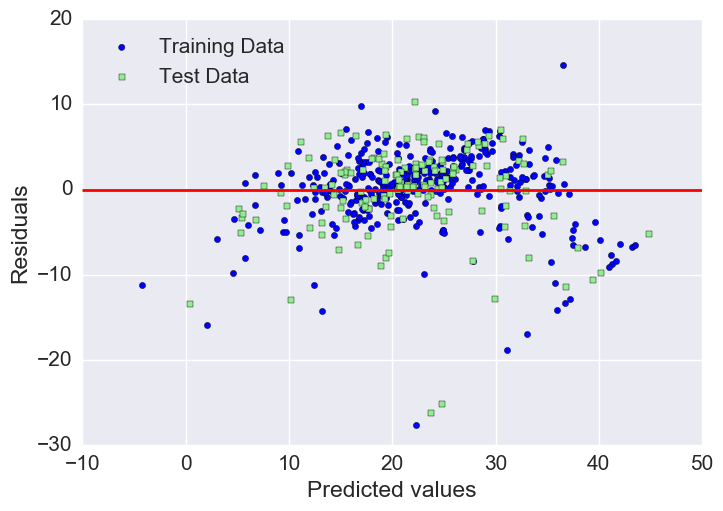

In [20]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='blue', 
            marker='o',
            label='Training Data')
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='lightgreen',
            marker='s',
            label='Test Data')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

We notice the outliers - Points with a large deviation from the centerline. Also notice the pattern in residuals, which means our model is unable to capture some explanatory variable!

Now, we compute a quantitative measure of the performance of the regression model. We compute MSE, which is the average of SSE cost function that we optimize to get the regression model. MSE is useful for comparing different regression model or tuning their parameters.

In [21]:
print "MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))

MSE Train: 19.958, Test: 27.196


It is noteworthy that MSE on test data is larger as compared to training so our model is overfitting the training data.

We now compute the coefficient of determination R2, which is a standardized version of MSE.

R2 = (1 - SSE / SST) where SST is the variance of the response variable.
R2 is the fraction of the response variance that is captured by the model.

In [22]:
print "R2 Training: %.3f, Test: %.3f" % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

R2 Training: 0.765, Test: 0.673


One way to tackle the overfitting problem is to use regularization. Let us try Ridge Regression, Least Absolute Shrinkage and Selection Operator (LASSO) Regression, and Elastic Net Regression methods.

First up, Ridge Regularization

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_regressor = Ridge(alpha=1.0)
lasso_regressor = Lasso(alpha=1.0)
elastic_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)
ridge_regressor.fit(X_train, y_train)
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print "MSE Train Ridge: %.3f, Test: %.3f" % (mean_squared_error(y_train, y_train_pred_ridge), mean_squared_error(y_test, y_test_pred_ridge))
print "R2 Train Ridge: %.3f, Test: %.3f" % (r2_score(y_train, y_train_pred_ridge), r2_score(y_test, y_test_pred_ridge))

MSE Train Ridge: 20.145, Test: 27.762
R2 Train Ridge: 0.762, Test: 0.667


Next is the Lasso Regularization

In [25]:
lasso_regressor.fit(X_train, y_train)
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)
print "MSE Train Lasso: %.3f, Test: %.3f" % (mean_squared_error(y_train, y_train_pred_lasso), mean_squared_error(y_test, y_test_pred_lasso))
print "R2 Train Lasso: %.3f, Test: %.3f" % (r2_score(y_train, y_train_pred_lasso), r2_score(y_test, y_test_pred_lasso))

MSE Train Lasso: 24.717, Test: 32.345
R2 Train Lasso: 0.708, Test: 0.612


Lastly, Elastic Regularization

In [ ]:
elastic_regressor.fit(X_train, y_train)
y_train_pred_elastic = elastic_regressor.predict(X_train)
y_test_pred_elastic = elastic_regressor.predict(X_test)
print "MSE Train Elastic: %.3f, Test: %.3f" % (mean_squared_error(y_train, y_train_pred_elastic), mean_squared_error(y_test, y_test_pred_elastic))
print "R2 Train Elastic: %.3f, Test: %.3f" % (r2_score(y_train, y_train_pred_elastic), r2_score(y_test, y_test_pred_elastic))